# Performances


## Counting triangles

In [1]:
import networkx as nx
import timeit
import pandas as pd


In [2]:
import os
from path import Path
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
os.chdir (PROJ_DIR)


In [3]:
import scripts.src.CountingTriangles as ct


In [4]:
def generateGraph(start=100, stop=500, step=100, density=0.70):
    listOfNetworks=[]
    for numberOfNodes in range(start, stop, step):
        numberOfEdges=int((density/2)*numberOfNodes*(numberOfNodes-1))
        graph= nx.gnm_random_graph(numberOfNodes, numberOfEdges, seed=42)
        listOfNetworks.append(graph)
    return listOfNetworks

def execution_time(listOfNetworks, counter, repeat=5):
    times={}
    for graph in listOfNetworks:
        time=[]
        for i in range(repeat):
            starttime = timeit.default_timer()
            counter.run(graph)
            #time in second
            time.append(timeit.default_timer() - starttime)
        times[(type(counter).__name__,len(graph.nodes._nodes))]=time
    return times

In [5]:
listOfNetworks=generateGraph()

In [6]:
listOfClasses=[ct.ObviousAlgorithm(),ct.EnumeratingNeighborPairs(), ct.DelegatingLowDegreeVertices()]
times={}
for myClass in listOfClasses:
    times.update(execution_time(listOfNetworks, myClass))

In [26]:
times_dataframe= pd.DataFrame.from_dict(times)

In [27]:
times_dataframe = times_dataframe.unstack().reset_index().drop("level_2", axis=1)
times_dataframe=times_dataframe.rename(columns={"level_0": "class", "level_1":"numberOfNodes",0:"time"})
times_dataframe

,class,numberOfNodes,time
0,ObviousAlgorithm,100,0.251958
1,ObviousAlgorithm,100,0.359878
2,ObviousAlgorithm,100,0.275149
3,ObviousAlgorithm,100,0.245491
4,ObviousAlgorithm,100,0.244877
5,ObviousAlgorithm,200,2.046710
6,ObviousAlgorithm,200,2.039426
7,ObviousAlgorithm,200,2.031747
8,ObviousAlgorithm,200,2.070583
9,ObviousAlgorithm,200,2.032057


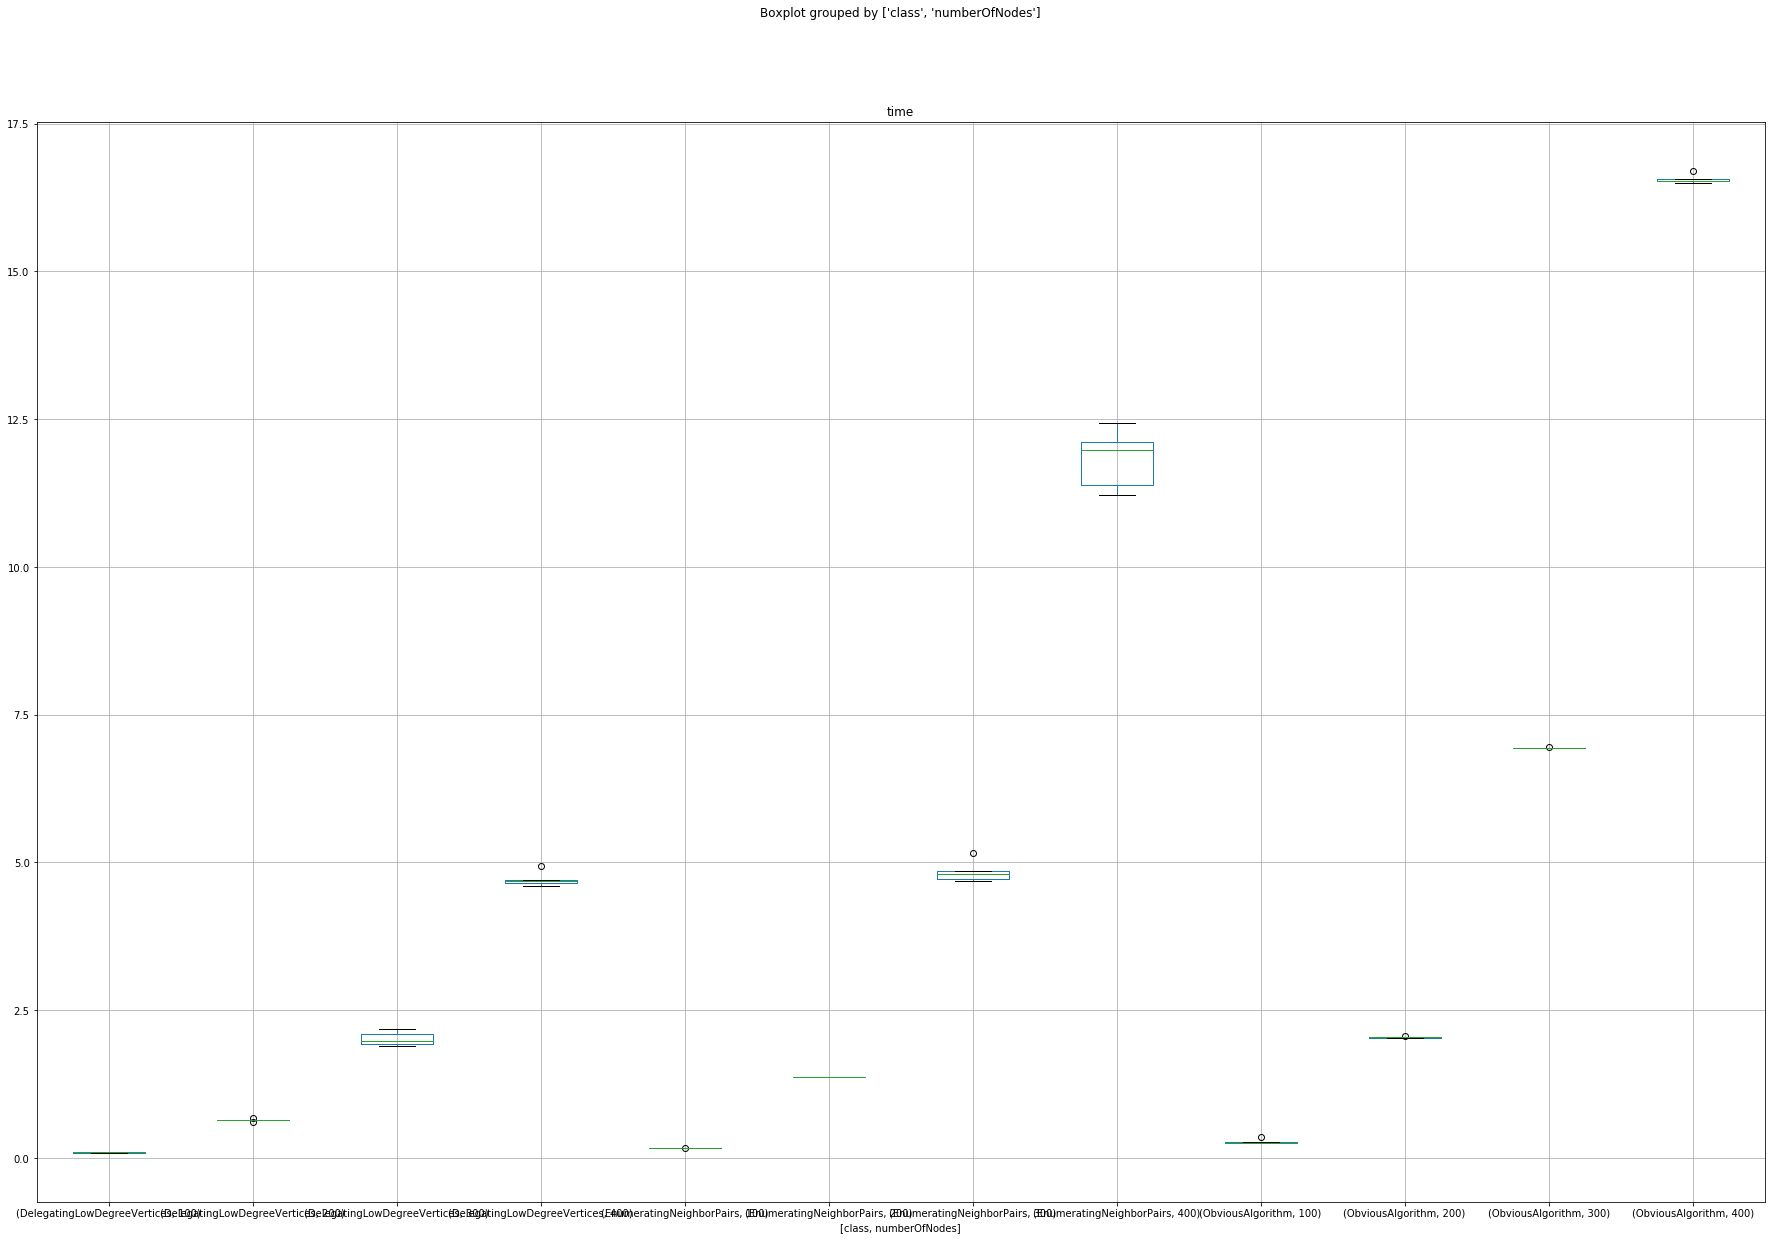

In [31]:
boxplot = times_dataframe.boxplot(column=['time'], by=['class', 'numberOfNodes'], figsize=(30, 20))
